In [169]:
import sounddevice as sd
import time
#Parameters--------------
fs = 48*10**3 #48k

#------------------------
sd.default.samplerate = fs
sd.default.channels = 1

n=0

In [173]:
# record something
duration = 20  # seconds
sig = sd.rec(int(duration * fs), samplerate=fs, channels=1)

time.sleep(duration+2)
fn = 'rec_{}_label_{}_.np'.format(n,0)
np.save(fn,sig)
n+=1

<IPython.core.display.Javascript object>


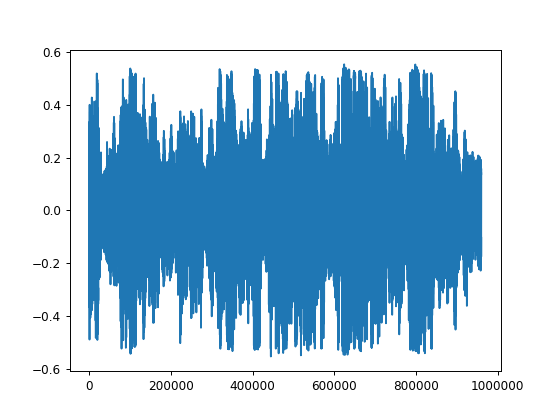

<IPython.core.display.Javascript object>


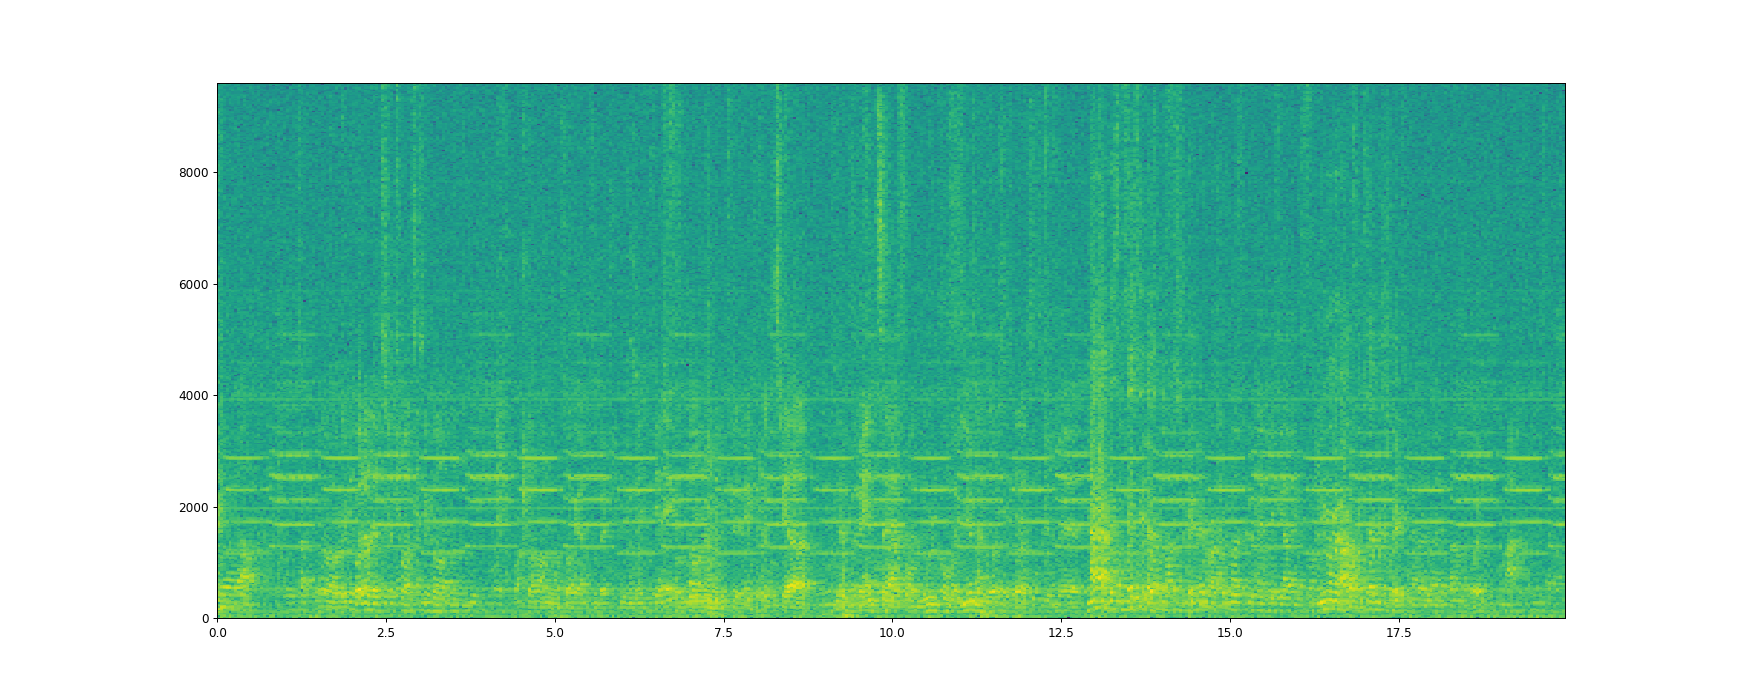

(0, 9600.0)

In [68]:
%matplotlib notebook
import matplotlib.pyplot as plt
from pylab import *
plt.plot(sig)

plt.figure(figsize=(20,8))
spectrum, freqs, t, im = specgram(sig.flatten(),Fs=fs,NFFT=2**11,scale='dB',noverlap=0)
plt.ylim(0, fs/5)

<IPython.core.display.Javascript object>


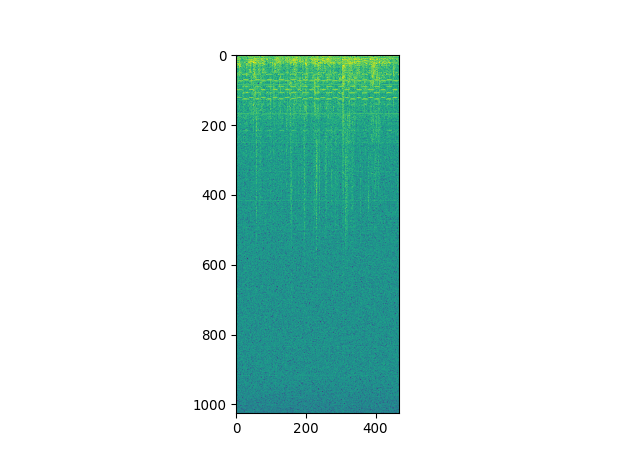

In [79]:
plt.imshow(np.log(spectrum))

In [73]:
f = np.fft.fft2(np.log(spectrum))

<IPython.core.display.Javascript object>


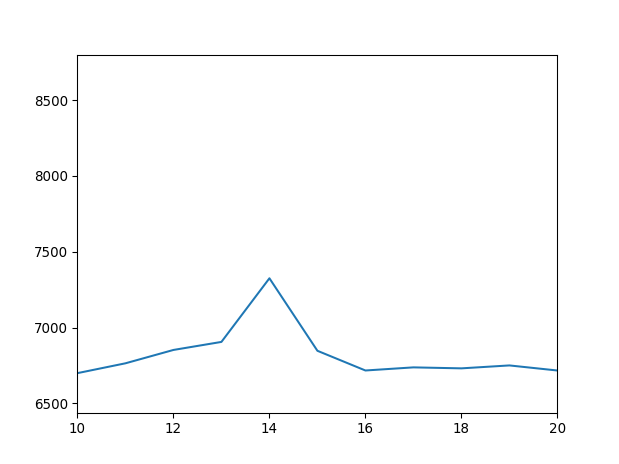

In [108]:
plt.figure()
plt.plot(np.log(np.abs(f)).sum(axis=0))
plt.xlim((10,20))
plt.show()

In [7]:

sd.play(myrecording, fs)

<IPython.core.display.Javascript object>


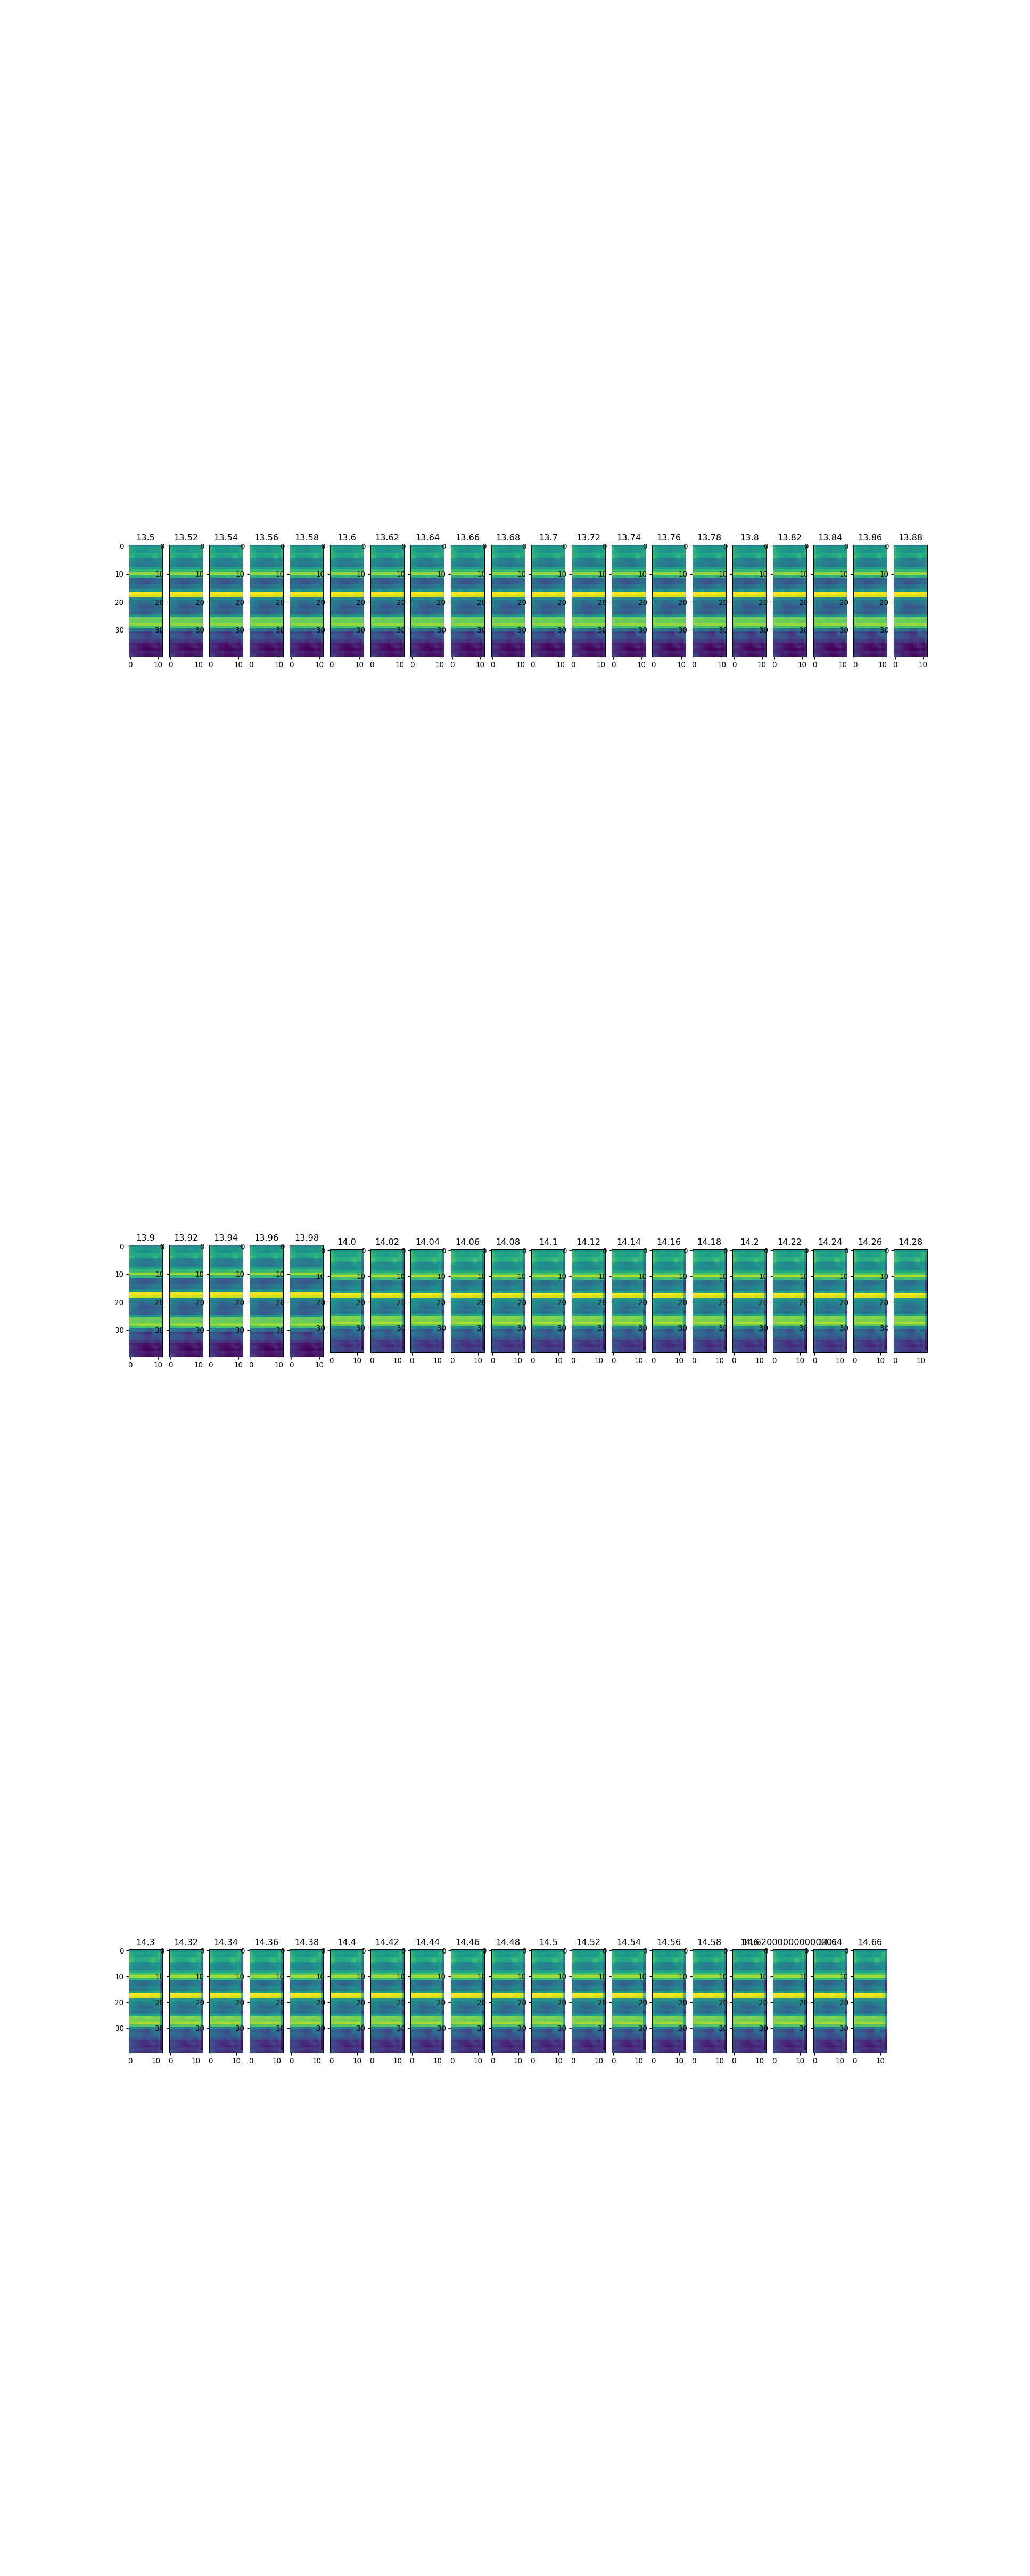

In [168]:
h = spectrum.shape[0]
b = spectrum.shape[1]
offset=130
plt.figure(figsize=(20,50))

for j in range(59):
    stepsize = 13.5+0.02*j
    acu = spectrum[:,offset + 0:offset+int(stepsize-1)]
    for i in range(1, 10): #(b//stepsize)
        acu += spectrum[:,offset + int(i*stepsize):offset+int((i*stepsize)+int(stepsize-1))]

    plt.subplot(3,20,j+1)
    plt.imshow(np.log(acu[80:120,:]))
    plt.title(str(stepsize))

In [139]:
int(np.floor(12.2))

12

In [101]:
stepsize = 14
for i in range(1,10):
    print(b//stepsize)

33
33
33
33
33
33
33
33
33
